## 1. Import Module

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

## 2. Load Image

(960, 960, 3)

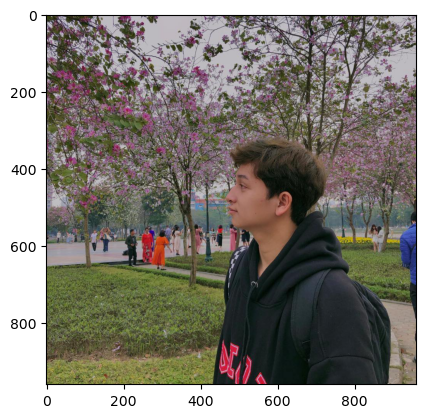

In [18]:
#Read image
img = mpimg.imread("../Bài tập lớn/anh_hieu.jpg")
# img1 = img[:, :, 0]
# img2 = img[:, :, 1]
# img3 = img[:, :, 2]
# img0 = np.resize(img, (img.shape[0], img.shape[1]))
# plt.imshow(img0)
# print(img0.shape)
# plt.imshow(img)
def imshow(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap = "gray")
    elif img.shape[2] == 1:
        plt.imshow(np.resize(img, (img.shape[0], img.shape[1])), cmap= "gray")
    else:
        plt.imshow(img)

if len(img.shape) < 3:
    img.resize(*img.shape, 1)

imshow(img)
img.shape

### Gamma Correction

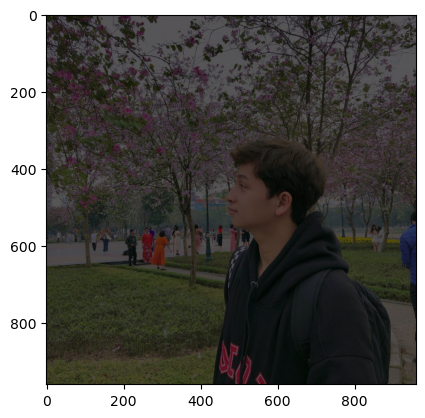

In [43]:
#Gamma Correction
def gammaCorrection(img, gamma):
    out = np.power(img.copy(), gamma)
    return out.astype(np.uint8)

imshow(gammaCorrection(img, 0.85))

plt.imsave("gamma.jpg", gammaCorrection(img, 1.1))

### Low Pass, High Pass and Gaussian Filter

In [49]:
#gfunc

# low pass filter
(lpfw,lpfh) = (3,3)
lowPassFilter = np.ones((lpfw,lpfh))/(lpfw*lpfh)
# print(lowPassFilter)

# high pass filter
(hpfw,hpfh) = (3,3)
highPassFilter = -1*np.ones((hpfw,hpfh))
highPassFilter[hpfw//2,hpfh//2] = -np.sum(highPassFilter)-1
# print(highPassFilter)

# gaussian filter
def gfunc(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*(sigma**2))))/(2*3.14*(sigma**2))

def gaussFilter(size, sigma):
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = gfunc(i-size[0]//2,j-size[1]//2, sigma )
    return out/np.sum(out)

(gfw,gfh) = (3,3)
gaussianFilter = gaussFilter((gfw,gfh),1)

print("Low Pass Filter")
print(lowPassFilter)

print("High Pass Filter")
print(highPassFilter)

print("Gaussian Filter")
print(gaussianFilter)

Low Pass Filter
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
High Pass Filter
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
Gaussian Filter
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


In [68]:
def convolution(image, filter):
    iw,ih,id = image.shape
    
    fw,fh = filter.shape    
    out = np.zeros((iw-fw+1,ih-fh+1,id))
    
    for d in range(id):
        for w in range(ih-fh+1):
            for h in range(iw-fw+1):
                out[w,h,d] = np.sum(filter*image[w:w+fh , h:h+fw , d])
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

def create_lowPassFilter(size: tuple):
    lowPassFilter= np.ones(size)*1/(size[0] * size[1])
    return lowPassFilter

def create_highPassFilter(size: tuple):
    (width, height) = size
    highPassFilter = -1 * np.ones((width, height))
    highPassFilter[width//2, height//2] = -np.sum(highPassFilter)-1
    return highPassFilter


def gfunc(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*(sigma**2))))/(2*3.14*(sigma**2))

def create_gaussianFilter(size, sigma):
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = gfunc(i-size[0]//2,j-size[1]//2, sigma )
    return out/np.sum(out)

create_lowPassFilter((3, 3))
create_highPassFilter((3,3))
create_gaussianFilter((3,3), 1)


array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

 ========================================= Low Pass Filter =========================================


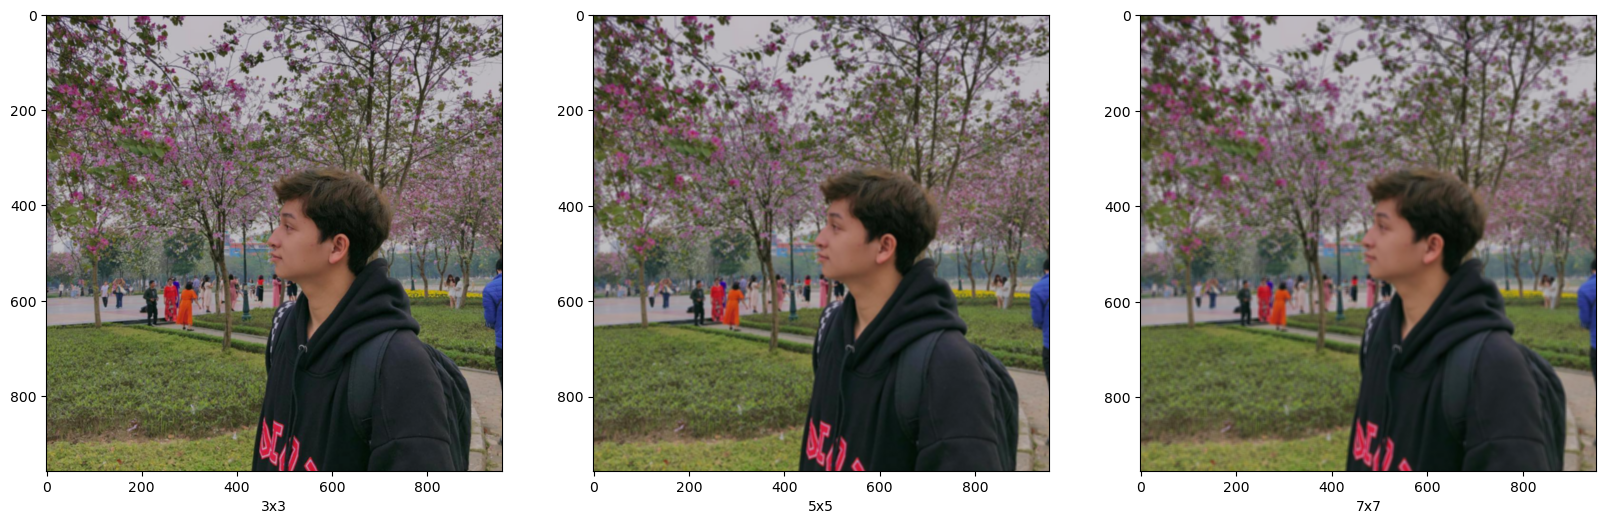

In [72]:
fig = plt.figure(1, figsize=(20, 16))
print(" ========================================= Low Pass Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    size =(i, i)
    lowPassFilter = create_lowPassFilter(size)
    result_image = convolution(img, lowPassFilter)
    imshow(result_image)
    plt.imsave(f"low{i}x{i}.jpg", result_image)